## Clusterização Hieráquica
> https://scikit-learn.org/stable/modules/generated/sklearn.cluster.AgglomerativeClustering.html

Avalie o algortimo de clusterização hieráquica aglomerativa para clusterizar os dados do dataset zoo.

#### Carreggue o dataset usando '\t' como separador

In [40]:
## code here
import pandas as pd 
df = pd.read_csv('zoo.tab', sep='\t', skiprows=[1,2])
df.set_index('name', inplace=True)
df

,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
name,,,,,,,,,,,,,,,,,
aardvark,yes,no,no,yes,no,no,yes,yes,yes,yes,no,no,4,no,no,yes,mammal
antelope,yes,no,no,yes,no,no,no,yes,yes,yes,no,no,4,yes,no,yes,mammal
bass,no,no,yes,no,no,yes,yes,yes,yes,no,no,yes,0,yes,no,no,fish
bear,yes,no,no,yes,no,no,yes,yes,yes,yes,no,no,4,no,no,yes,mammal
boar,yes,no,no,yes,no,no,yes,yes,yes,yes,no,no,4,yes,no,yes,mammal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
wallaby,yes,no,no,yes,no,no,no,yes,yes,yes,no,no,2,yes,no,yes,mammal
wasp,yes,no,yes,no,yes,no,no,no,no,yes,yes,no,6,no,no,no,insect
wolf,yes,no,no,yes,no,no,yes,yes,yes,yes,no,no,4,yes,no,yes,mammal


#### Transforme os atributos discretos em contínuos e normalize os atributos

In [41]:
## code here
df.replace('yes', 1, inplace=True)
df.replace('no', 0, inplace=True)
df

,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
name,,,,,,,,,,,,,,,,,
aardvark,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,mammal
antelope,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,mammal
bass,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,fish
bear,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,mammal
boar,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,mammal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
wallaby,1,0,0,1,0,0,0,1,1,1,0,0,2,1,0,1,mammal
wasp,1,0,1,0,1,0,0,0,0,1,1,0,6,0,0,0,insect
wolf,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,mammal


In [42]:
X = df[['hair', 'feathers', 'eggs', 'milk', 'airborne', 'aquatic', 'predator',
       'toothed', 'backbone', 'breathes', 'venomous', 'fins', 'legs', 'tail',
       'domestic', 'catsize']]
y = df[['type']]

In [43]:
normal_X=(X-X.mean())/X.std()

In [44]:
normal_X

,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize
name,,,,,,,,,,,,,,,,
aardvark,1.145568,-0.497494,-1.169249,1.193580,-0.559135,-0.730121,0.9,0.812404,0.466173,0.512996,-0.272976,-0.450301,0.573452,-1.723369,-0.384618,1.122497
antelope,1.145568,-0.497494,-1.169249,1.193580,-0.559135,-0.730121,-1.1,0.812404,0.466173,0.512996,-0.272976,-0.450301,0.573452,0.574456,-0.384618,1.122497
bass,-0.864200,-0.497494,0.846697,-0.829437,-0.559135,1.355939,0.9,0.812404,0.466173,-1.929841,-0.272976,2.198529,-1.387067,0.574456,-0.384618,-0.881962
bear,1.145568,-0.497494,-1.169249,1.193580,-0.559135,-0.730121,0.9,0.812404,0.466173,0.512996,-0.272976,-0.450301,0.573452,-1.723369,-0.384618,1.122497
boar,1.145568,-0.497494,-1.169249,1.193580,-0.559135,-0.730121,0.9,0.812404,0.466173,0.512996,-0.272976,-0.450301,0.573452,0.574456,-0.384618,1.122497
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
wallaby,1.145568,-0.497494,-1.169249,1.193580,-0.559135,-0.730121,-1.1,0.812404,0.466173,0.512996,-0.272976,-0.450301,-0.406808,0.574456,-0.384618,1.122497
wasp,1.145568,-0.497494,0.846697,-0.829437,1.770593,-0.730121,-1.1,-1.218606,-2.123676,0.512996,3.626687,-0.450301,1.553711,-1.723369,-0.384618,-0.881962
wolf,1.145568,-0.497494,-1.169249,1.193580,-0.559135,-0.730121,0.9,0.812404,0.466173,0.512996,-0.272976,-0.450301,0.573452,0.574456,-0.384618,1.122497


#### Aplique a clusterização usando diferentes métodos de ligação  {‘ward’, ‘complete’, ‘average’, ‘single’}. Observe que a distância utilizada por default é a euclideana.

In [55]:
## code here 
from sklearn.cluster import AgglomerativeClustering

#WARD
ward_clustering = AgglomerativeClustering(linkage='ward', distance_threshold=0, n_clusters=None).fit(normal_X)

#COMPLETE
complete_clustering = AgglomerativeClustering(linkage='complete', distance_threshold=0, n_clusters=None).fit(normal_X)

#AVERAGE
average_clustering = AgglomerativeClustering(linkage='average', distance_threshold=0, n_clusters=None).fit(normal_X)

#SINGLE
single_clustering = AgglomerativeClustering(linkage='single', distance_threshold=0, n_clusters=None).fit(normal_X)

#### Plot o dendograma de cada clusterização

In [56]:
## code here
from scipy.cluster.hierarchy import dendrogram
import numpy as np

def plot_dendrogram(model, **kwargs):
    # Create linkage matrix and then plot the dendrogram

    # create the counts of samples under each node
    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)
    for i, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1  # leaf node
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count

    linkage_matrix = np.column_stack([model.children_, model.distances_,
                                      counts]).astype(float)

    # Plot the corresponding dendrogram
    dendrogram(linkage_matrix, **kwargs)

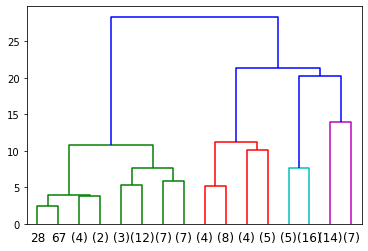

In [71]:
#WARD
plot_dendrogram(ward_clustering, truncate_mode='level', p=3)

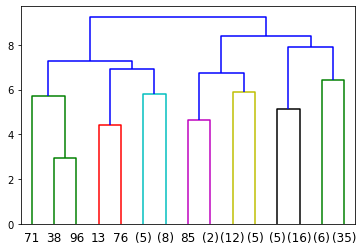

In [66]:
#COMPLETE
plot_dendrogram(complete_clustering, truncate_mode='level', p=3)

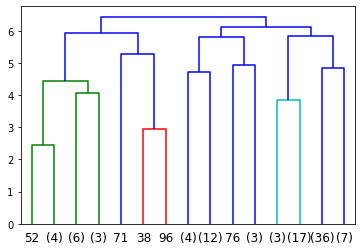

In [67]:
#AVERAGE
plot_dendrogram(average_clustering, truncate_mode='level', p=3)

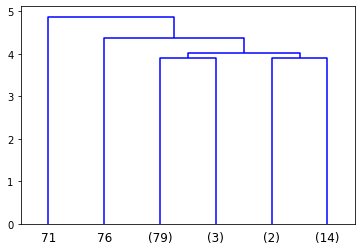

In [72]:
#SINGLE
plot_dendrogram(single_clustering, truncate_mode='level', p=3)

### DBSCAN

A célula a seguir cria o dataset utilizado nesse exercício

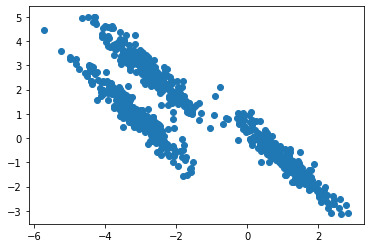

In [76]:
from sklearn.datasets.samples_generator import make_blobs
import matplotlib.pyplot as plt

n_samples=750
random_state = 170
X, y = make_blobs(n_samples=n_samples, random_state=random_state)
transformation = [[0.6, -0.6], [-0.4, 0.8]]
dataset = np.dot(X, transformation)

# Mostrar os dados
plt.scatter(dataset[:,0], dataset[:,1])
plt.show()

#### Clusterize os dados usando clusterização Hierárquica e plot novamente os pontos com cores diferentes para cada cluster

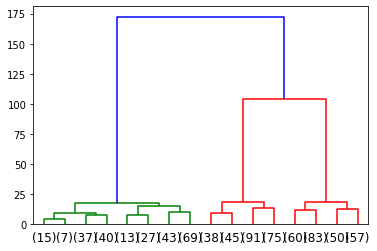

In [79]:
## code here
blobs_cluster = AgglomerativeClustering(distance_threshold=0, n_clusters=None).fit(X)
plot_dendrogram(blobs_cluster, truncate_mode='level', p=3)

#### Clusterize os dados usando o algoritmo DBSCAN e plot novamente os pontos com cores diferentes para cada cluster
> https://scikit-learn.org/stable/modules/generated/sklearn.cluster.DBSCAN.html

In [105]:
def plot_db_clusters(db, X, labels):
    core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
    core_samples_mask[db.core_sample_indices_] = True
    unique_labels = set(db.labels_)
    n_clusters = len(unique_labels) - (1 if -1 in labels else 0)
    colors = plt.cm.Spectral(np.linspace(0, 1, len(unique_labels)))
    for k, col in zip(unique_labels, colors):
        if k == -1:
            # Black used for noise.
            col = 'k'

        class_member_mask = (db.labels_ == k)

        xy = X[class_member_mask & core_samples_mask]
        plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=col,
                 markeredgecolor='k', markersize=14)

        xy = X[class_member_mask & ~core_samples_mask]
        plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=col,
                 markeredgecolor='k', markersize=6)

    plt.title('Nombre de Clusters: %d' % n_clusters)

In [103]:
## code here
from sklearn.cluster import DBSCAN
blobs_cluster = DBSCAN(eps=1.5, min_samples=100).fit(X)
blobs_cluster.labels_

array([ 1,  0,  0,  0,  1,  0,  1,  0,  1,  1,  2,  1,  2, -1,  1,  0,  0,
        1,  2,  0,  1,  1,  2,  1,  1,  1,  2,  2,  0,  1,  1,  0,  1,  0,
        2,  1,  1,  1,  1,  0,  1,  0,  2,  1,  0,  0,  0,  2,  2,  2,  0,
        1,  2,  1,  2,  1,  1,  1,  0,  2,  0,  1,  2,  2,  2,  1,  0,  2,
        1,  2,  0,  2,  2,  0,  0,  2,  1,  2,  2,  2,  1,  2,  1,  0,  0,
        0,  1,  2, -1,  1,  2,  0,  2,  1,  2,  2,  1,  0,  2,  0,  2,  0,
        2,  2,  1,  1,  2,  0,  2,  2,  0,  0,  2,  1,  1,  1,  1,  2,  1,
        1,  1,  2,  1,  1,  1,  2,  0,  2,  2,  1,  0,  0,  0,  2,  0,  1,
        0,  1,  1,  1,  1,  0,  0,  1,  1,  2,  0,  0,  1,  2,  1,  1,  2,
        2,  2,  1,  2,  1,  0,  2,  1,  1,  1,  2,  2,  1,  1,  0,  0,  2,
        0,  2,  2,  0,  1,  2,  2,  0,  0,  0,  0,  0,  2,  2,  1,  2,  2,
        0,  2,  1,  0,  1,  1,  0,  0, -1,  1,  2,  2,  2, -1,  0,  0,  0,
        0,  1,  1,  0,  0,  2,  1,  0,  2,  0,  2,  2,  0,  1,  0,  0,  1,
        0,  0,  0, -1,  1

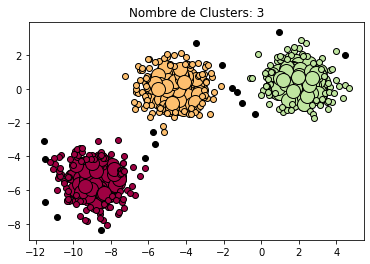

In [106]:
labels = set(blobs_cluster.labels_)
plot_db_clusters(blobs_cluster, X, labels)